In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys

In [17]:
file_date = '2019-10-28-144314-1-10'

In [18]:
print(os.getcwd())
import glob
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/single/ddpg/64_64_NN/new/point25/SARA/'+file_date+'/log/*.csv')
# Agent_1_interaction_data_files = glob.glob('../save/SARA/'+file_date+'/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/single/ddpg/64_64_NN/new/point25/SARA/2019-10-28-144314-1-10/log\\2019-10-28.csv']

In [19]:
Agent_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_interaction_data[file]['Observation'] = Agent_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_interaction_data[file]['Action'] = Agent_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_interaction_data[file].shape)

(25000, 4)


In [20]:
Agent_interaction_data_all = {}
Agent_interaction_data_all['data'] = pd.DataFrame()
Agent_interaction_data_all['separate_line'] = []
Agent_interaction_data_all['date'] = []
for key in Agent_interaction_data.keys():
    Agent_interaction_data_all['data'] = pd.concat([Agent_interaction_data_all['data'], Agent_interaction_data[key]])
    Agent_interaction_data_all['separate_line'].append(len(Agent_interaction_data[key]))
    Agent_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [21]:

# Convert action into np.array
Agent_action = np.array(Agent_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_action_df = pd.DataFrame(Agent_action, columns = action_space_name['actuator_name'])
Agent_action_df.shape

(25000, 168)

In [22]:
Agent_action_df

actuator_name,light_node#1,light_node#2,light_node#3,light_node#4,light_node#5,light_node#6,light_node#7,light_node#8,light_node#9,light_node#10,...,sma3_node#23,sma4_node#23,sma5_node#23,sma6_node#23,sma1_node#24,sma2_node#24,sma3_node#24,sma4_node#24,sma5_node#24,sma6_node#24
0,0.790986,-0.665169,0.948870,-0.445590,-0.734934,-0.549745,0.639193,-0.682131,-0.000305,-0.773508,...,-0.078880,0.561813,-0.855071,0.363544,0.970766,-0.887305,-0.151600,-0.155687,-0.563577,0.966609
1,0.797535,0.289595,-0.559517,0.092294,-0.101227,0.236195,0.577091,0.981194,-0.063049,0.508265,...,-0.847149,-0.344845,0.985711,-0.705148,-0.295811,-0.052626,-0.058872,0.621694,-0.455451,0.097079
2,0.914744,0.021199,-0.258260,0.331115,-0.733844,0.295669,0.264024,-0.472846,-0.103173,-0.876980,...,-0.288098,0.815382,-0.441055,0.910141,-0.966745,-0.468550,0.291061,0.764192,-0.093425,-0.616951
3,0.810870,-0.035895,-0.443420,-0.502965,-0.231465,0.311783,0.003168,-0.278652,-0.154297,0.814562,...,0.878903,-0.628332,-0.849293,-0.073012,-0.784921,-0.475669,0.967957,-0.501650,0.581899,0.295115
4,-0.461636,-0.111285,-0.737749,-0.925190,0.576792,0.428337,0.089850,-0.631145,0.013010,0.026752,...,0.228375,-0.542462,-0.768515,-0.686306,-0.350072,-0.823448,-0.957761,-0.298728,0.784019,-0.008152
5,-0.788353,0.419989,-0.967710,0.288505,0.576566,0.005056,0.527890,-0.338240,-0.707834,-0.898781,...,0.617023,0.287979,0.371836,0.434103,0.006945,0.941818,-0.210968,0.375191,0.156364,0.975960
6,-0.992562,0.830811,-0.569633,-0.546092,0.667913,-0.733289,-0.311073,0.798795,-0.337609,-0.905582,...,-0.262522,0.786976,0.176322,0.156354,0.718311,0.621978,-0.218156,0.159258,-0.544208,-0.530960
7,0.176114,-0.409977,0.053695,-0.777483,-0.467980,0.004842,0.540809,0.100685,0.417595,0.918869,...,0.790571,-0.891098,0.491225,-0.920232,0.390950,0.966044,-0.911182,-0.586690,-0.306474,0.276326
8,0.081094,-0.756738,0.923210,-0.483609,-0.767887,0.514803,0.987862,0.124436,0.777370,-0.678499,...,-0.033360,-0.117419,-0.214746,0.467895,0.516609,-0.064297,0.211464,0.450415,-0.372176,0.832656
9,-0.170755,-0.189513,0.000397,0.593489,0.633486,-0.350367,-0.966736,0.412138,0.316523,0.182533,...,0.943632,-0.428324,-0.749865,0.031829,0.322660,0.490292,-0.218555,0.538486,0.915630,0.201818


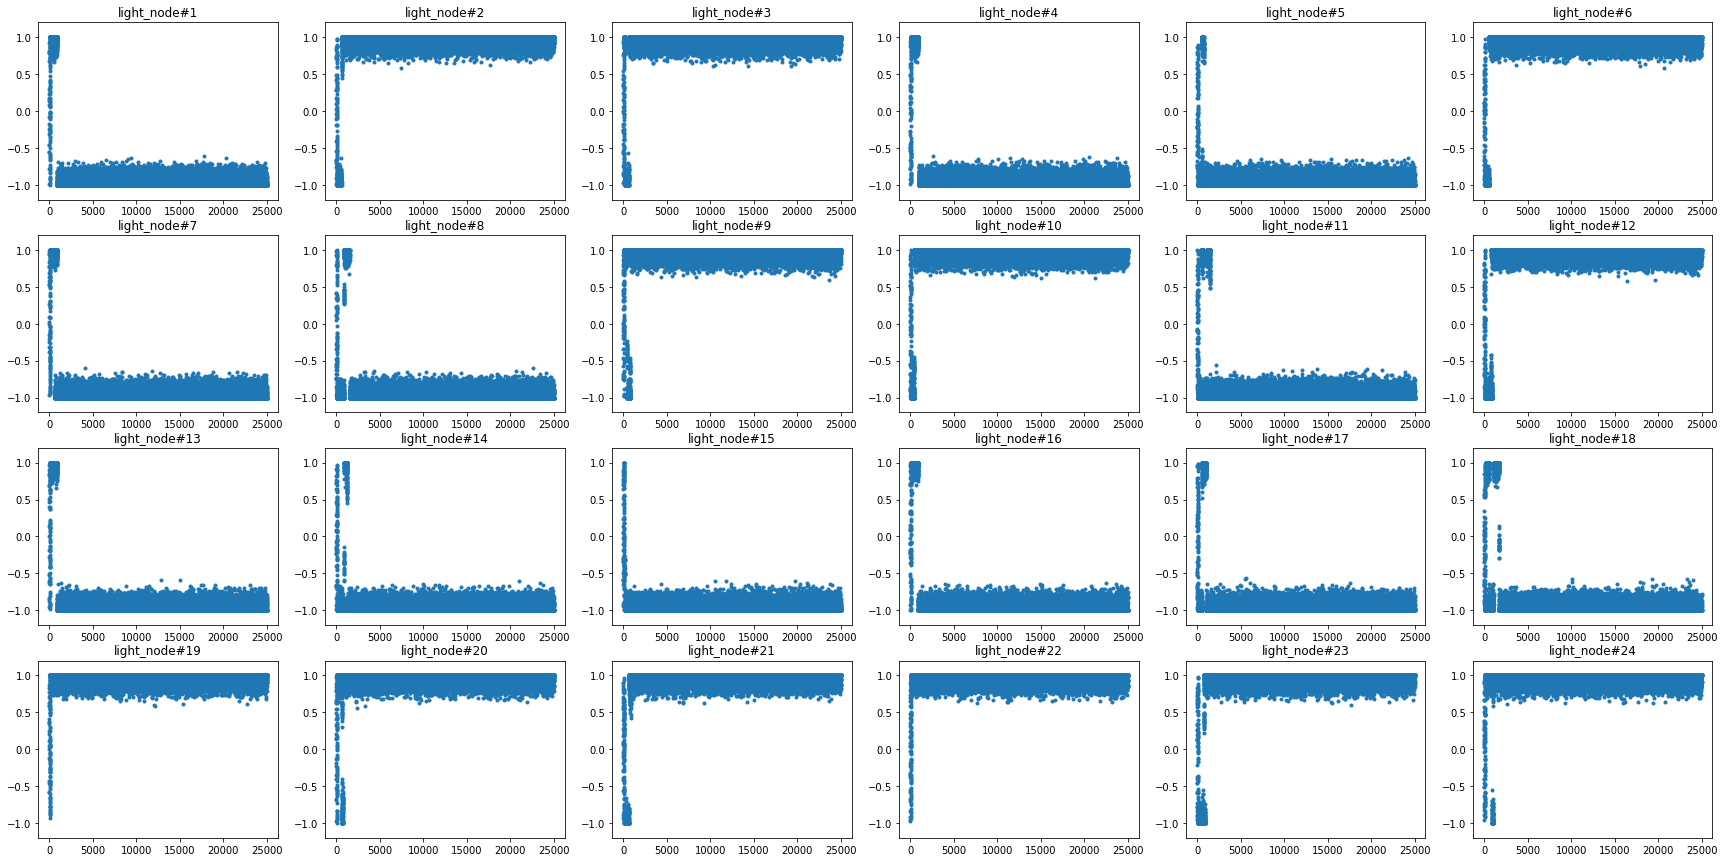

In [34]:
fig = plt.figure(figsize=(30,15))
for i in range(24):
    ax = fig.add_subplot(4,6,i+1)
    col_name = 'light_node#'+str(i+1)
    plt.ylim(-1.2,1.2)
    plt.plot(Agent_action_df.index[:], Agent_action_df[col_name][:],'.')
    plt.title(col_name)
    

In [24]:
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.cm as cm

def plot_action_on_scene(action,ax=None, norm = None):
    nodes_position = pd.read_csv("NodePosition.csv")
    if ax is None:
        fig = plt.figure(figsize=(12.5,7.5))
        ax = fig.add_subplot(111)    
    plt.scatter(nodes_position['x'],nodes_position['z'],c = action, cmap = "YlGnBu", s = 100, norm=norm)
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    plt.colorbar()
def plot_obs_on_scene(action,ax=None, norm = None):
    nodes_position = pd.read_csv("NodePosition.csv")
    if ax is None:
        fig = plt.figure(figsize=(12.5,7.5))
        ax = fig.add_subplot(111)    
    plt.scatter(nodes_position['x'],nodes_position['z'],c = action, cmap = "YlOrRd", s = 100, norm=norm)
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    plt.colorbar()

Average action values of last 10000 steps:[-0.33889215300000003, -0.0210858102, -0.11200812119159997, -0.18503791599999994, 0.128419732, -0.11179110200000002, 0.15575026399999997, 0.219562693, 0.09320919119999999, -0.2762920394, 0.076957493, -0.09747461180000001, -0.18928935200000002, -0.14320801379999998, -0.0693088144, -0.12572485299999997, -0.6162229044, -0.04348800375539999, -0.025592414600000002, 0.15226566940000003, 0.045236742199999985, -0.07102009340000001, 0.31628866499999997, 0.0059400618000000184]


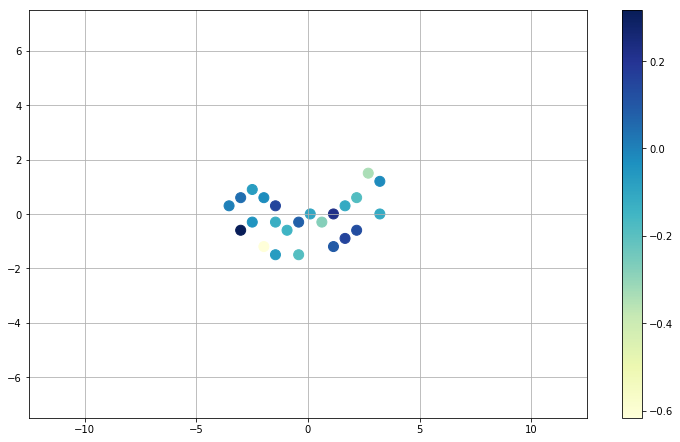

In [41]:
action_range = [5,10]
action = []

for i in range(24):
    col_name = 'light_node#'+str(i+1)
    action.append(np.average(Agent_action_df[col_name][action_range[0]:action_range[1]]))
print("Average action values of last 10000 steps:{}".format(action))
plot_action_on_scene(action)
plt.savefig("./plots_for_thesis/visitor_position/single/action_history_[{},{}].png".format(action_range[0],action_range[1]))

In [28]:
Agent_observation = np.array(Agent_interaction_data_all['data']['Observation'].tolist())
# read action_space_name
col = []
for i in range(24):
    col.append("IR#"+str(i+1))

Agent_observation_df = pd.DataFrame(Agent_observation, columns = col)
Agent_observation_df.shape

(25000, 24)

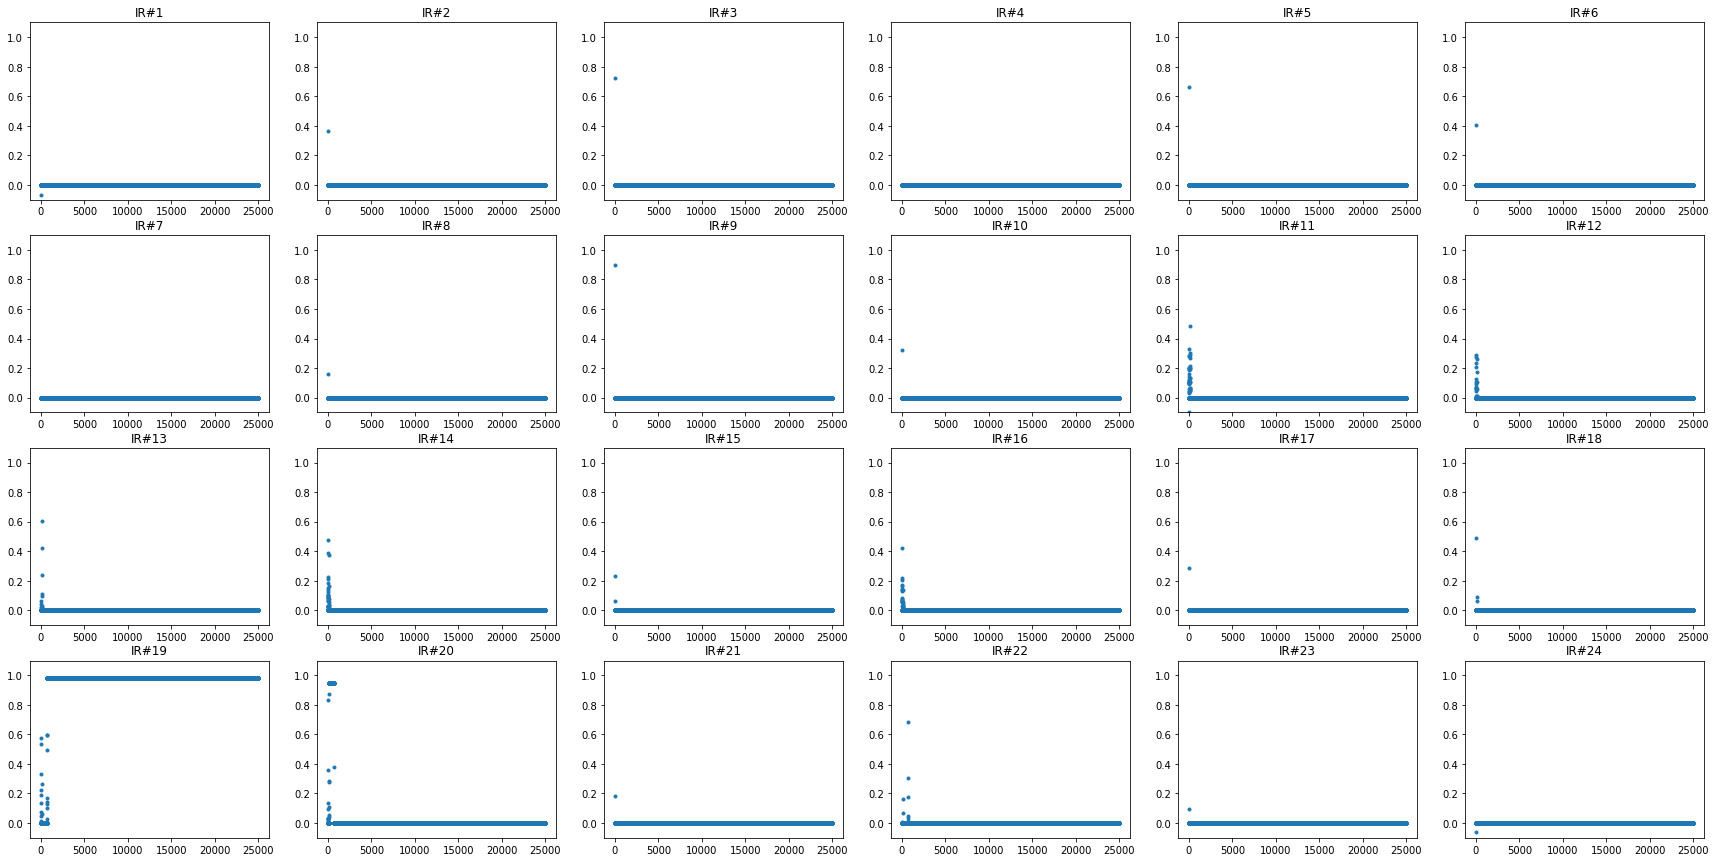

In [33]:
fig = plt.figure(figsize=(30,15))
for i in range(24):
    ax = fig.add_subplot(4,6,i+1)
    col_name = 'IR#'+str(i+1)
    plt.plot(Agent_observation_df.index, Agent_observation_df[col_name],'.')
    plt.ylim((-0.1,1.1))
    plt.title(col_name)

Average IR observations:[0.06941098 0.36409748 0.72302824 0.76335543 0.66266364 0.40423512
 0.8530002  0.16259652 0.8948724  0.3236152  0.09932887 0.69688314
 0.37198892 0.73268968 0.40537352 0.93106504 0.28915083 0.4866382
 2.1289448  1.15308892 0.18048541 0.37815484 0.50479644 0.06288141]


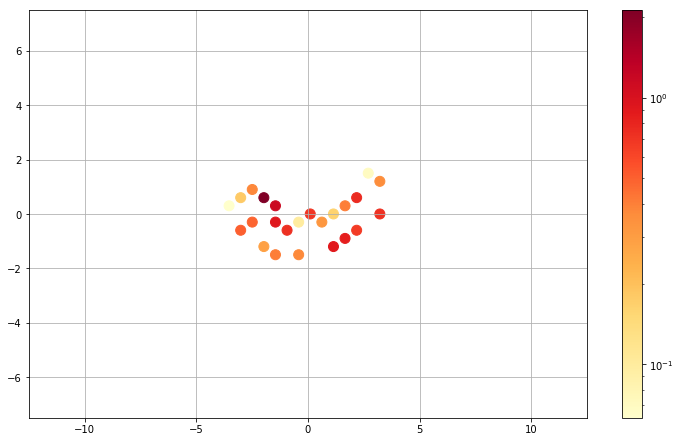

In [39]:
from matplotlib.colors import LogNorm
obs_range = [0, 20]
obs = []
for i in range(24):
    col_name = 'IR#'+str(i+1)
    obs.append(np.sum(Agent_observation_df[col_name][obs_range[0]:obs_range[1]]))
obs = np.abs(obs)
for i, o in enumerate(obs):
    if o == 0:
        obs[i] = 1e-3
print("Average IR observations:{}".format(obs))
plot_obs_on_scene(obs, norm=LogNorm())
plt.savefig("./plots_for_thesis/visitor_position/single/IR_history_[{},{}].png".format(obs_range[0],obs_range[1]))

---------------

## Action Analysis

In [36]:
# percentage of lights turned on
light_cols = []
for i in range(1,25):
    col_name = 'light_node#'+str(i)
    light_cols.append(col_name)
Agent_light_action_df = Agent_action_df[light_cols]

num_lights_ON = []
for idx, row in Agent_light_action_df.iterrows():
    num_lights_ON.append(np.sum(row>0))
Agent_light_action_df = Agent_light_action_df.assign(num_ON=num_lights_ON ) 
Agent_light_action_df.head()

actuator_name,light_node#1,light_node#2,light_node#3,light_node#4,light_node#5,light_node#6,light_node#7,light_node#8,light_node#9,light_node#10,...,light_node#16,light_node#17,light_node#18,light_node#19,light_node#20,light_node#21,light_node#22,light_node#23,light_node#24,num_ON
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,-0.659564,-0.646320,0.067506,-0.972784,0.806035,0.932177,-0.832241,-0.117846,0.978934,0.756395,...,-0.746611,0.578706,-0.825737,-0.860801,0.670274,0.758696,-0.496161,0.868023,-0.018336,10
2,-0.659564,-0.646320,0.067506,-0.972784,0.806035,0.932177,-0.832241,-0.117846,0.978934,0.756395,...,-0.746611,0.578706,-0.825737,-0.860801,0.670274,0.758696,-0.496161,0.868023,-0.018336,10
3,-0.659564,-0.646320,0.067506,-0.972784,0.806035,0.932177,-0.832241,-0.117846,0.978934,0.756395,...,-0.746611,0.578706,-0.825737,-0.860801,0.670274,0.758696,-0.496161,0.868023,-0.018336,10
4,-0.592066,-0.801106,0.079371,-0.989671,0.914960,0.835369,-0.608568,0.080828,0.937929,0.757014,...,-0.838267,0.540939,-0.699628,-0.754543,0.612350,0.762662,-0.718659,0.874318,-0.214315,11


(0, 24)

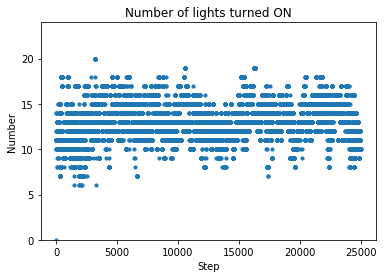

In [45]:
plt.figure()
plt.scatter(Agent_light_action_df[:25000].index,Agent_light_action_df[:25000]['num_ON'], s=10)
plt.title("Number of lights turned ON")
plt.ylabel("Number")
plt.xlabel("Step")
plt.ylim(0,24)

## Visitor activities

In [32]:
import re
import glob
# Process log

interval = ["point125","point25","point5","point75"]
itv = interval[2]
algorithm = "td3" # "ppo"
log_dir = "../SHARCNET/Results/debug/"+algorithm+"/"+itv+"/"
modes = ["SARA","PLA"]
all_data_files = dict()

print("Interval {}".format(itv))
for mode in modes:

    visitor_log_file = glob.glob(log_dir + mode + "/**/*.out",recursive=True)
    print("{}: {} files:".format(mode, len(visitor_log_file)))
    for log_file in visitor_log_file:
        print(log_file)
        f_in = open(log_file, "r")
        
        name_split = log_file.split("\\")[:-1]
        csv_file_name = ""
        for s in name_split:
            csv_file_name += s + "/"
        csv_file_name += "visitor_log.csv"
        f_out = open(csv_file_name,"w")
        cnt = 0
        # skip lines in the header
        for _ in range(300):
            line = f_in.readline()
            if 'Loading' in line:
                cnt += 1
            if cnt >= 25:
                break;

        # save into CSV
        
        f_out.write("Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed\n")
        for line in f_in:
            if line.strip():
                # not empty line    
                x = re.search("^\d+(\.\d{1,2})", line)
                if x is not None:
                    f_out.write(line.replace('(','').replace(')',''))

        f_in.close()
        f_out.close()

Interval point5
SARA: 2 files:
../SHARCNET/Results/debug/td3/point5/SARA\2019-09-18-002419-1-0\s_sara_19418782ob.out
../SHARCNET/Results/debug/td3/point5/SARA\2019-09-18-002427-0-0\s_sara_19430914ob.out
PLA: 2 files:
../SHARCNET/Results/debug/td3/point5/PLA\2019-09-18-002419-1-0\s_single_PLA19418781.out
../SHARCNET/Results/debug/td3/point5/PLA\2019-09-18-133000-1-0\s_single_PLA19443500.out


### 1. Position

In [33]:
def plot_position_history(visitor_data, mode):
    nodes_position = pd.read_csv("NodePosition.csv")
    plt.figure()
    plt.scatter(visitor_data['Location_x'], visitor_data['Location_z'])
    plt.xlim([-12.5,12.5])
    plt.ylim([-7.5,7.5])
    plt.title("{}:Visitor Position in Space".format(mode))
    plt.scatter(nodes_position['x'], nodes_position['z'])

import seaborn
def heat_map(resolution, data_x, data_z):
    bins_x = np.linspace(-12.5,12.5,resolution[0]+1)
    bins_z = np.linspace(-7.5,7.5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (x_discretized[i],z_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
    ax.invert_yaxis()
    return ax, activity_map

def plot_heat_map(visitor_data, mode):
    resolution = (10,10)
    plt.figure()
    ax, activity_map = heat_map(resolution,visitor_data['Location_x'],visitor_data['Location_z'])
    ax.set_title("{}:Position heat map".format(mode))


SARA: 2 files:
../SHARCNET/Results/debug/td3/point5/SARA\2019-09-18-002419-1-0\visitor_log.csv
(612493, 9)
../SHARCNET/Results/debug/td3/point5/SARA\2019-09-18-002427-0-0\visitor_log.csv
(612491, 9)
PLA: 2 files:
../SHARCNET/Results/debug/td3/point5/PLA\2019-09-18-002419-1-0\visitor_log.csv
(612493, 9)
../SHARCNET/Results/debug/td3/point5/PLA\2019-09-18-133000-1-0\visitor_log.csv
(612493, 9)


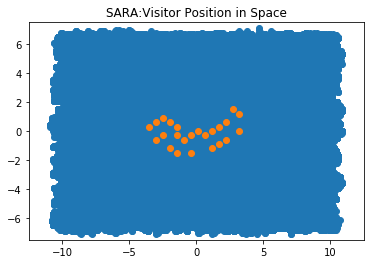

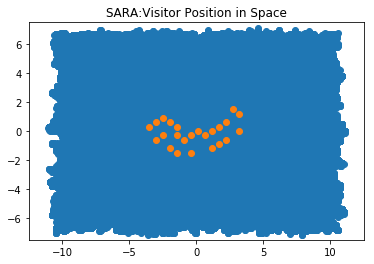

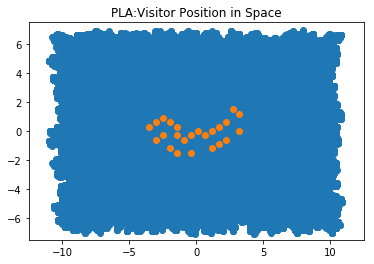

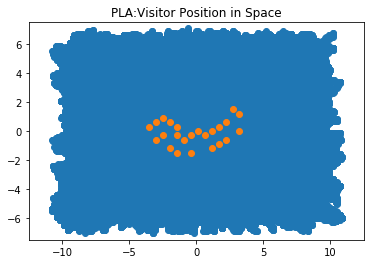

In [34]:
visitor_data_file = dict()

for mode in modes:
    visitor_data_file[mode] = glob.glob(log_dir + mode + "/**/visitor_log.csv",recursive=True)
    
for mode in modes:
    print("{}: {} files:".format(mode, len(visitor_data_file[mode])))
    for data_file in visitor_data_file[mode]:
        print(data_file)
        visitor_data = pd.read_csv(data_file, sep=',')
        print(visitor_data.shape)

        plot_position_history(visitor_data, mode)

        

In [35]:
def get_cur_directory(csv_file):
    name_split = csv_file.split("\\")[:-1]
    png_directory = ""
    for s in name_split:
        png_directory += s + "/"
    return png_directory

../SHARCNET/Results/debug/td3/point5/SARA\2019-09-18-002419-1-0\visitor_log.csv
(612493, 9)
../SHARCNET/Results/debug/td3/point5/SARA\2019-09-18-002427-0-0\visitor_log.csv
(612491, 9)
../SHARCNET/Results/debug/td3/point5/PLA\2019-09-18-002419-1-0\visitor_log.csv
(612493, 9)
../SHARCNET/Results/debug/td3/point5/PLA\2019-09-18-133000-1-0\visitor_log.csv
(612493, 9)


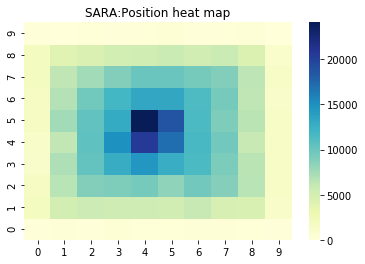

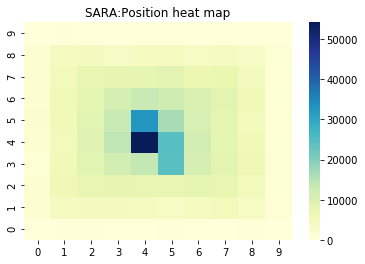

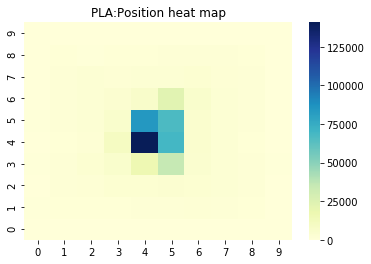

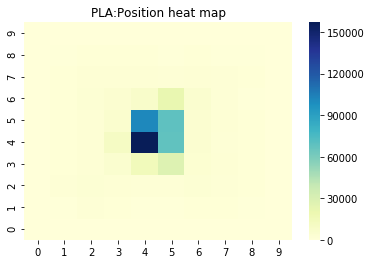

In [36]:
for mode in modes:
    for data_file in visitor_data_file[mode]:
        print(data_file)
        visitor_data = pd.read_csv(data_file, sep=',')
        print(visitor_data.shape)
        png_dir = get_cur_directory(data_file)
        plot_heat_map(visitor_data, mode)
        plt.savefig(png_dir+'{}_{}_heat.png'.format(itv,mode), bbox_inches='tight')

### 2. Visitor's moving distances

In [4]:
# movements in vector
visitor_data['Movement_x'] = visitor_data['Location_x'].diff()
visitor_data['Movement_z'] = visitor_data['Location_z'].diff()

In [5]:
import math
movement_length = []
for idx, row in visitor_data.iterrows():
    d = math.sqrt(row['Movement_x']*row['Movement_x']+row['Movement_z']*row['Movement_z'])
    movement_length.append(d)
    

In [6]:
visitor_data['Movement_length'] = movement_length

Text(0.5, 1.0, 'SARA: Movement')

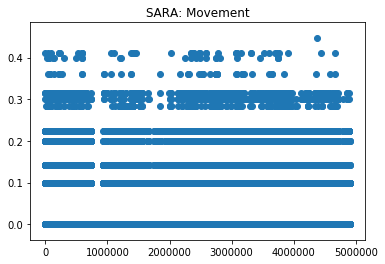

In [22]:
# plot
plt.scatter(visitor_data.index[1:], visitor_data['Movement_length'][1:])
plt.title("SARA: Movement")

In [7]:
total_length = visitor_data['Movement_length'][1:].copy().values # copy() is important!
for i in range(1,len(total_length)):
    total_length[i] = total_length[i] + total_length[i-1]


Text(0.5, 0, 'Step')

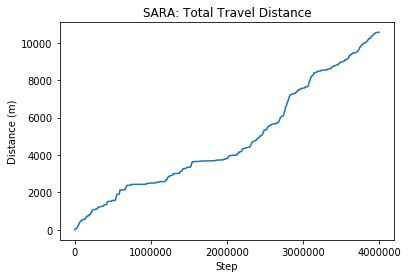

In [8]:
plt.plot(np.linspace(1,len(total_length[:4000000]),len(total_length[:4000000])), total_length[:4000000])
plt.locator_params(nbins=5, axis='x')
plt.title("SARA: Total Travel Distance")
plt.ylabel('Distance (m)')
plt.xlabel('Step')

In [16]:
 total_length = np.append([0], total_length)

In [17]:
visitor_data["Total_movement"] = total_length

In [63]:
total_length_SARA = total_length
%store total_length_SARA

Stored 'total_length_SARA' (ndarray)


### 3. Destination changes

In [18]:
dest_change_x = [False]
for i in range(1,visitor_data.shape[0]):
    dest_change_x.append(visitor_data.iloc[i]["Destination_x"] != visitor_data.iloc[i-1]["Destination_x"])

In [19]:
dest_change = dest_change_x
for i in range(1, visitor_data.shape[0]):
    if dest_change_x[i]:
        dest_change[i] = visitor_data.iloc[i]["Destination_z"] != visitor_data.iloc[i-1]["Destination_z"]

In [20]:
total_dest_change = dest_change.copy()
total_dest_change[0] = 0
for i in range(1,len(total_dest_change)):
    total_dest_change[i] = total_dest_change[i] + total_dest_change[i-1]

Text(0.5, 0, 'Step')

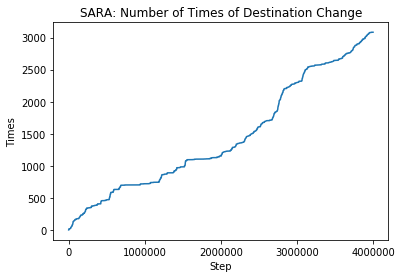

In [11]:
plt.plot(np.linspace(1,len(total_dest_change[:4000000]),len(total_dest_change[:4000000])), total_dest_change[:4000000])
plt.locator_params(nbins=5, axis='x')
plt.title("SARA: Number of Times of Destination Change")
plt.ylabel('Times')
plt.xlabel('Step')

In [21]:
visitor_data["Total_dest_change"] = total_dest_change

In [23]:
visitor_data.to_csv("visitor_data_SARA_"+file_date+".csv")

In [10]:
total_dest_change_SARA = total_dest_change
%store total_dest_change_SARA

Stored 'total_dest_change_SARA' (list)


### visitor's activities between 200-700 episode

In [36]:
total_ep = 1000
start_ep = 200
end_ep = 700
total_time = visitor_data.iloc[-1,0]
period = [total_time * start_ep/total_ep, total_time * end_ep/total_ep]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]

In [37]:
period_data.head()

,Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed
122493,2500.02,-8.7,0.1,-6.3,-8.2,0.1,-0.9,5.371106,-0.002066
122494,2500.04,-8.8,0.1,-6.3,-8.2,0.1,-0.9,5.405626,-0.000014
122495,2500.06,-8.8,0.1,-6.3,-8.2,0.1,-0.9,5.440577,-0.000014
122496,2500.08,-8.9,0.1,-6.4,-8.2,0.1,-0.9,5.475950,-0.000014
122497,2500.10,-9.0,0.0,-6.4,-8.2,0.1,-0.9,5.511737,-0.000014


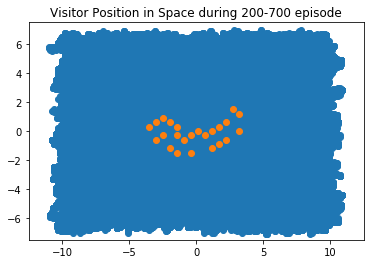

In [38]:
plt.scatter(period_data['Location_x'], period_data['Location_z'])
plt.xlim([-12.5,12.5])
plt.ylim([-7.5,7.5])
plt.title("Visitor Position in Space during {}-{} episode".format(start_ep,end_ep))
plt.scatter(nodes_position['x'], nodes_position['z'])

Text(0.5, 1.0, 'Position heat map during 200-700 episode')

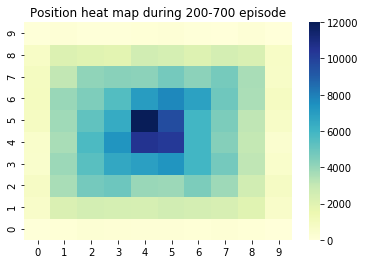

In [39]:
resolution = (10,10)
period_data = period_data.reset_index(drop=True)
activity_map = heat_map(resolution,period_data['Location_x'],period_data['Location_z'])
plt.title("Position heat map during {}-{} episode".format(start_ep,end_ep))

In [51]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# speed

In [52]:
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0        

Text(0, 0.5, 'Instant Speed (m/s)')

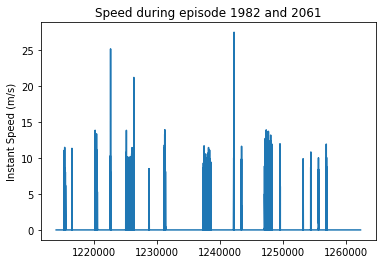

In [53]:
plt.plot(speed)
plt.title("Speed during episode 1982 and 2061")
plt.ylabel("Instant Speed (m/s)")

Text(0, 0.5, 'Instant Speed (m/s)')

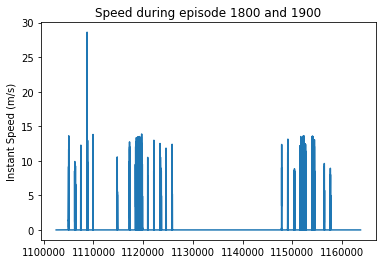

In [57]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0    
plt.plot(speed)
plt.title("Speed during episode 1800 and 1900")
plt.ylabel("Instant Speed (m/s)")

<font color=red>The vistor is constantly moving.</font>
***

### visitor's activities between 1800-1900 episode

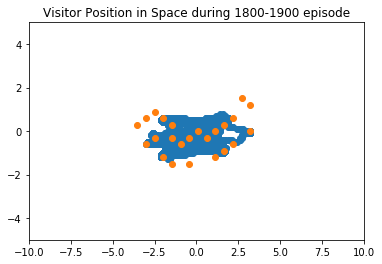

In [54]:
period = [total_time * 1800/8000, total_time * 1900/8000]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]
plt.scatter(period_data['Location_x'], period_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space during 1800-1900 episode")
plt.scatter(nodes_position['x'], nodes_position['z'])

Text(0, 0.5, 'Instant Speed (m/s)')

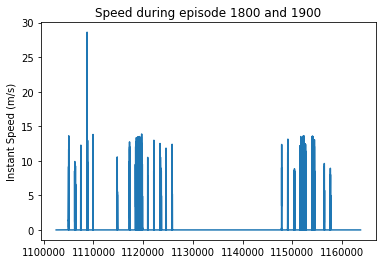

In [55]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0    
plt.plot(speed)
plt.title("Speed during episode 1800 and 1900")
plt.ylabel("Instant Speed (m/s)")